In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

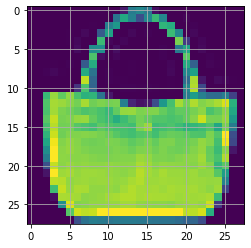

In [5]:
plt.figure()
plt.imshow(train_images[100])
plt.grid(True)

In [6]:
train_images = train_images / 255.0
test_images = test_images / 255.0

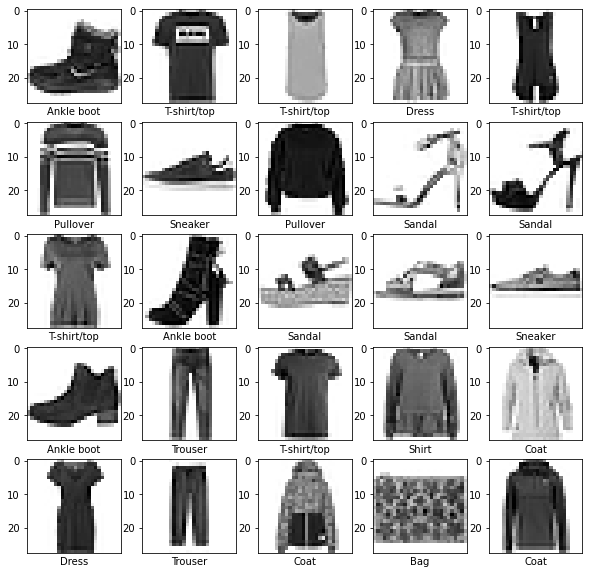

In [7]:
%matplotlib inline

plt.figure(figsize = (10,10))
for i in range(25):
    plt.subplot(5,5,i + 1)
    plt.xticks([])
    plt.xticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [8]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [9]:
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [10]:
model.fit(train_images, train_labels, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5052 - accuracy: 0.8227
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3778 - accuracy: 0.8656
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3410 - accuracy: 0.8769
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3142 - accuracy: 0.8850
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2938 - accuracy: 0.8919
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2821 - accuracy: 0.8954
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2694 - accuracy: 0.8999
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2580 - accuracy: 0.9045
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2483 - accuracy: 0.9068
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.24

In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)
print('\nAccuracy ', test_acc)

313/313 - 0s - loss: 0.3531 - accuracy: 0.8805

Accuracy  0.8805000185966492


In [13]:
predictions = model.predict(test_images)

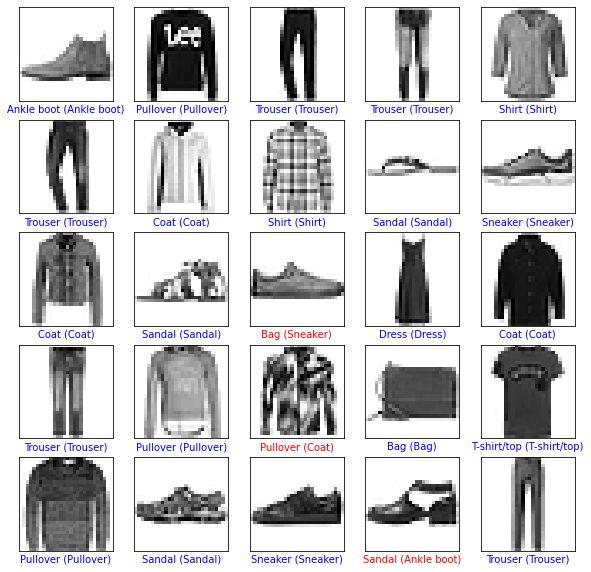

In [15]:
plt.figure(figsize = (10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap = plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel('{} ({})'.format(class_names[predicted_label], class_names[true_label]), color = color)